## Time Series Analysis

__Time Series: Time series is an ordered sequence of values of a variable at equally spaced time intervals.__

__The problem on which we are working is a time series problem and we want to predict the number of airplane passengers after 10 years considering the previous data. While working on this probel we need go through a pipeline to deal with time series problem: visualizing the time series, stationarize the time series, plot ACF/PACF charts and finding optimal parameters, build the ARIMA model and make predictions.__

###  Step #01: Importing Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pylab as plt 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12

### Step #02: Fetching Data

In [2]:
#Fetching data from CSV using pandas dataframe
original_data = pd.read_csv('AirPassengers.csv')

__We have two columns in our dataset, first one is temporal(relaing to time) which is "Month" in our case and second one is the value to be predicted that is "Passengers"(Number of airplane passengers)__

### Step #03: Exploratory Data Analysis

* __What is the shape of data ?__

In [3]:
original_data.shape

(144, 2)

__We have 144 rows and 2 columns__

* __Lets have a look to a basic info of the dataset__

In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


* __Univariate analysis: Descriptive Analysis__

__*   Column: Month__

In [5]:
original_data.Month.describe()

count         144
unique        144
top       1958-01
freq            1
Name: Month, dtype: object

#### We need to convert datatype of the column "Month" from "object" to "datatime"

In [6]:
original_data['Month'] = pd.to_datetime(original_data['Month'], infer_datetime_format=True)
#Verification
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


__*  Column: #Passengers__

__Basic describtion of the column__

In [7]:
original_data['#Passengers'].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

__Renaming Column__

In [8]:
# renaming column name for the sake of ease
original_data.rename(columns={'#Passengers':'Passengers'}, inplace=True)

### Spliting Data for testing purpose

In [9]:
X = original_data.Month
Y = original_data.Passengers

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=60, shuffle=False)

In [11]:
training_data = pd.DataFrame(x_train)
training_data['Passengers'] = y_train
training_data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [12]:
testing_data = pd.DataFrame(x_test)
testing_data['Passengers'] = y_test
testing_data.set_index(testing_data.Month, inplace=True)
testing_data.drop(['Month'], axis=1, inplace=True)

In [13]:
testing_data

,Passengers
Month,
1956-01-01,284
1956-02-01,277
1956-03-01,317
1956-04-01,313
1956-05-01,318
1956-06-01,374
1956-07-01,413
1956-08-01,405
1956-09-01,355


#### For the sake of visualizing passengers against Months, we need to make Month as an index, so the index will act by default as the x-axis.

In [14]:
dataset = original_data.set_index(original_data.Month)
# Verfying Changes
dataset

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
1949-06-01,1949-06-01,135
1949-07-01,1949-07-01,148
1949-08-01,1949-08-01,148
1949-09-01,1949-09-01,136


In [15]:
# Removing duplicate column
dataset.drop(columns='Month', axis=1, inplace=True)

In [16]:
# Verifying Changes 
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


* __Visualising data to explore trend component__

/home/arsal/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


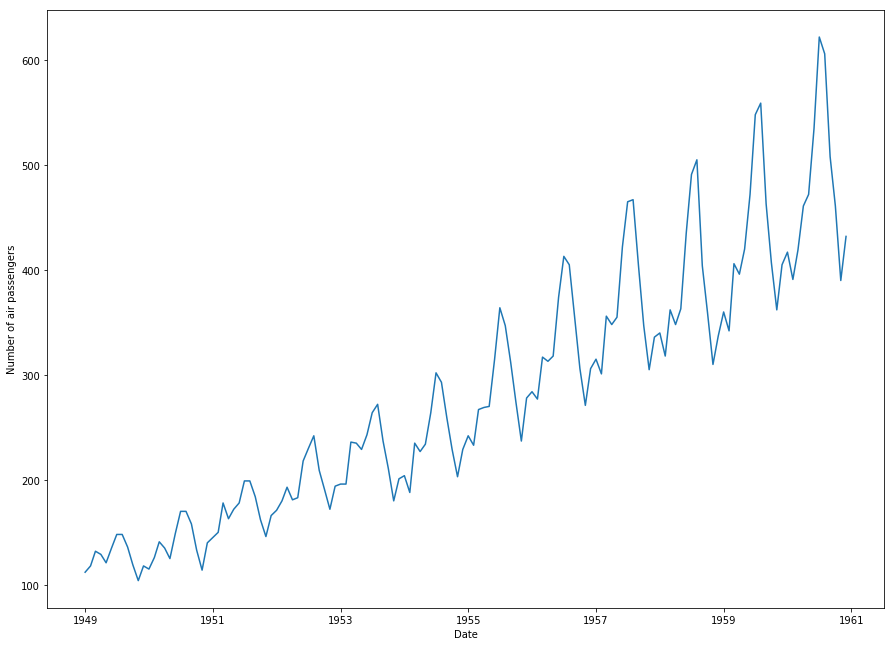

In [17]:
# Visualizing No. of airplane passengers against temporal(Month)
plt.figure(figsize=(15,11))
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(dataset)

__We need to visualize the data to have a look that either is there any trend in our data or not with the help line plot.  As we can see in the above graph that our data have an upward trend__

### Step #04: Data Transformation

__Before getting in the process of data transformation, we first need to look for the stationarity of the data, and to achieve this goal we need to calculate "Rolling Statistics"__


__The "Rolling Mean" and "Rolling Standard Deviation" are the two different components of the "Rolling Statistics"__

In [18]:
# Calculating rolling average
rolling_average = dataset.rolling(window=12).mean()

In [19]:
# Calculating rolling standard deviation
rolling_std = dataset.rolling(window=12).std()

* __Rolling Average__

In [20]:
rolling_average

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


* __Rolling Standard Deviation__

In [21]:
rolling_std

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


* __Original data__

In [22]:
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


* __Visualizing "Rolling Statistics" with "Original Data"__

In [23]:
def comparasion_graph():
    plt.figure(figsize=(15,11))
    orig = plt.plot(dataset, color='blue', label='Original')
    mean = plt.plot(rolling_average, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

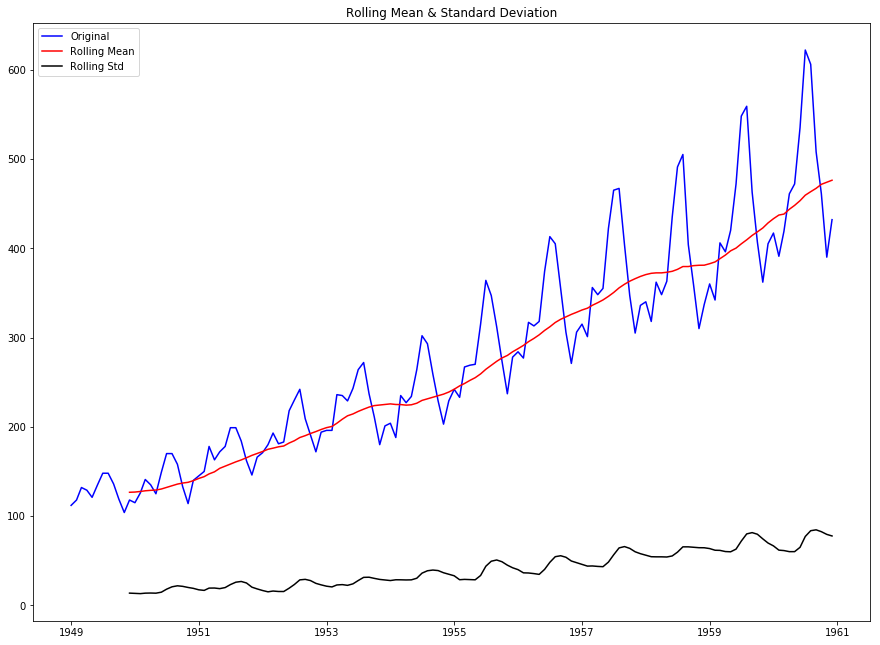

In [24]:
comparasion_graph()

In [25]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(dataset['Passengers'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


### Data Transformation

__Now we need to move towards transforamtion to achieve Stationarity__

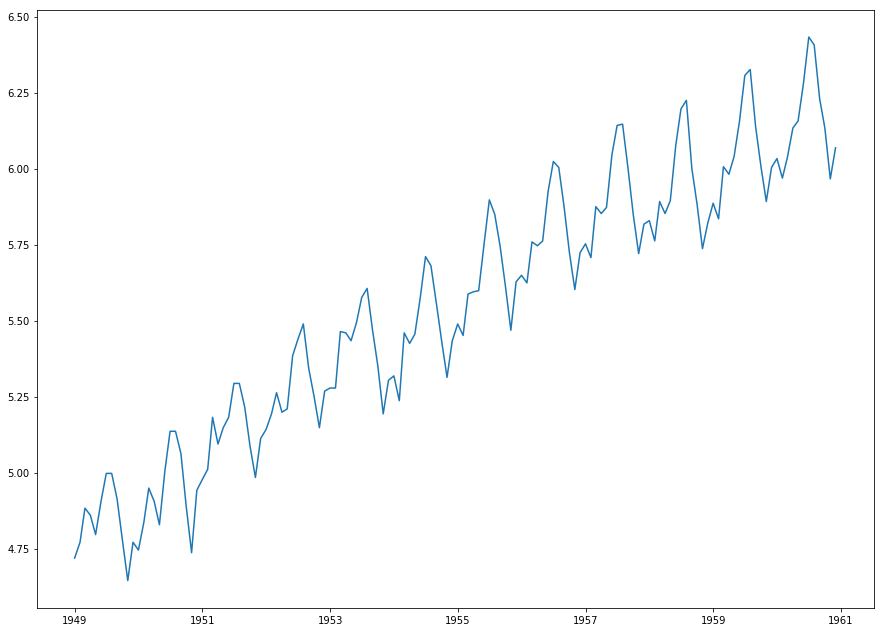

In [26]:
#Log Scale transformation
plt.figure(figsize=(15,11))
dataset_log = np.log(dataset)
plt.plot(dataset_log)

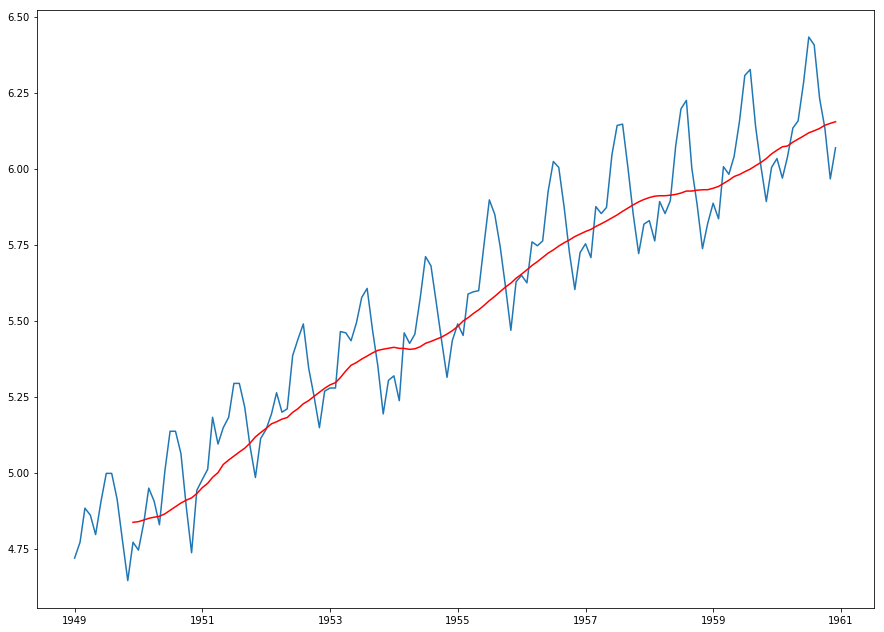

In [27]:
# moving average transformation
plt.figure(figsize=(15,11))
movingAverage = dataset_log.rolling(window=12).mean()
movingStd = dataset_log.rolling(window=12).std()
plt.plot(dataset_log)
plt.plot(movingAverage, color='red')

In [28]:
datasetLog_Minus_MovingAverage = dataset_log - movingAverage
datasetLog_Minus_MovingAverage

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [29]:
#Remove NAN values
datasetLog_Minus_MovingAverage.dropna(inplace=True)
datasetLog_Minus_MovingAverage.head(10)

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [30]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(15,11))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

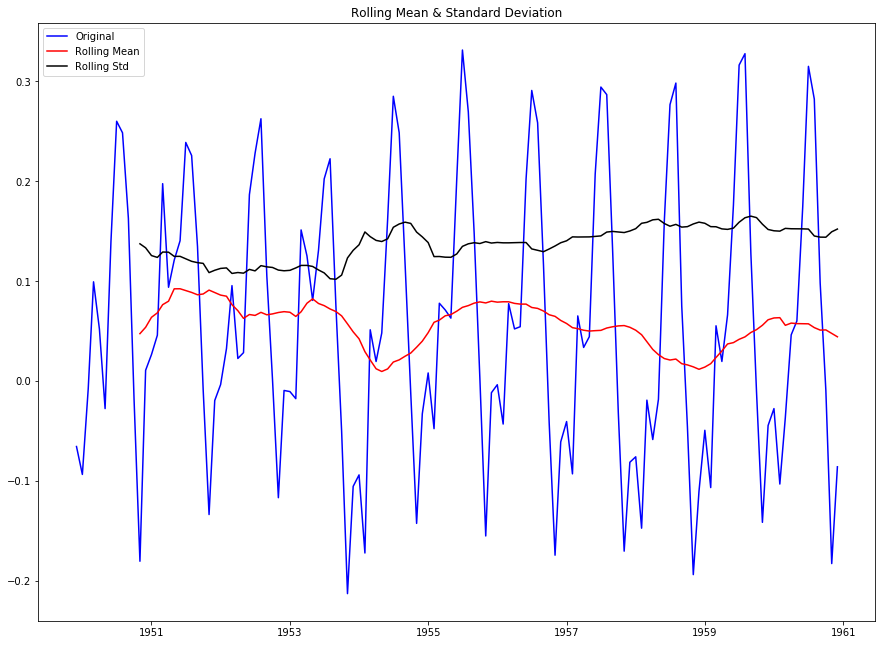

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


In [31]:
test_stationarity(datasetLog_Minus_MovingAverage)

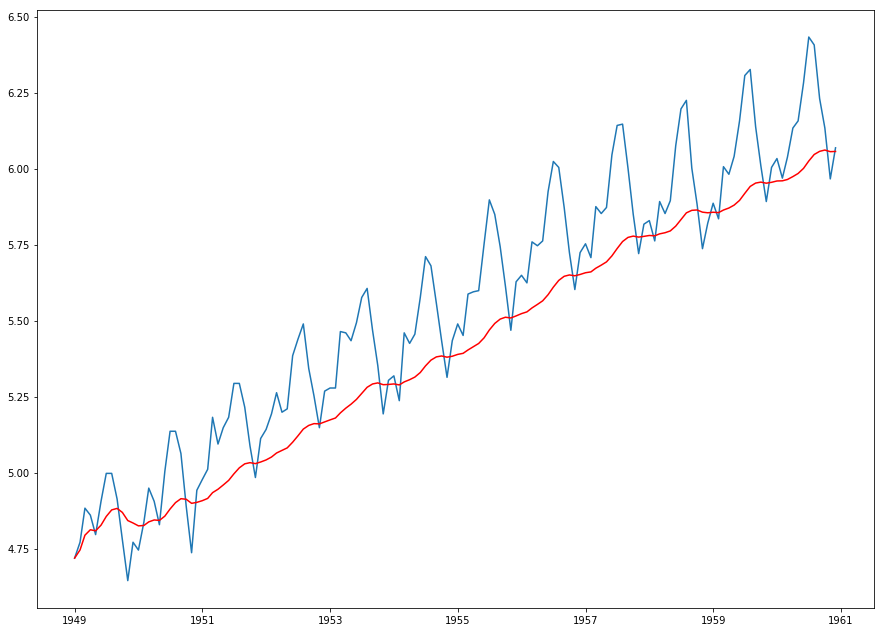

In [32]:
# Exponential Decay Transformation
plt.figure(figsize=(15,11))
exponentialDecayWeightedAverage = dataset_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(dataset_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

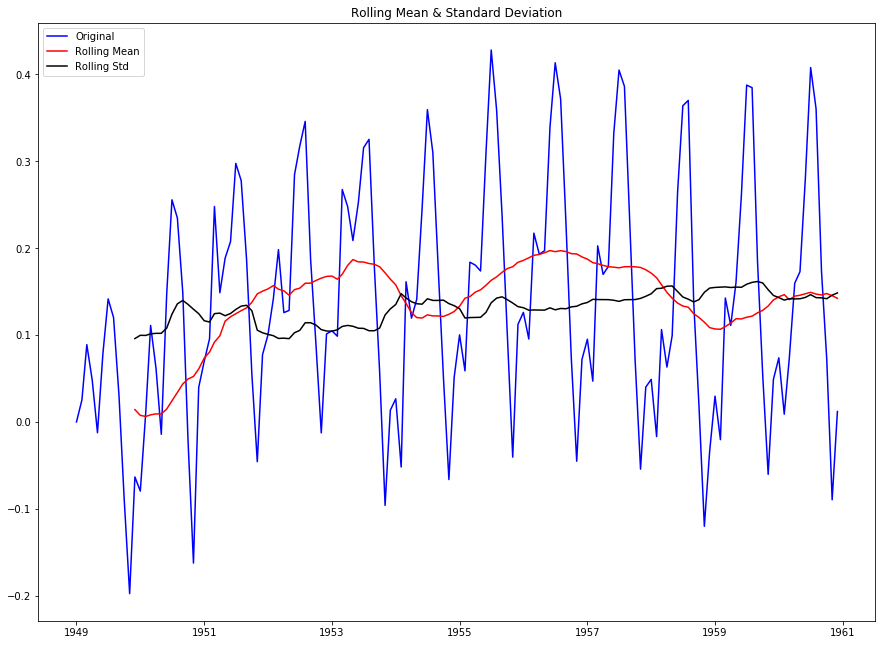

Results of Dickey Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
datasetLog_Minus_ExponentialMovingAverage = dataset_log - exponentialDecayWeightedAverage
test_stationarity(datasetLog_Minus_ExponentialMovingAverage)

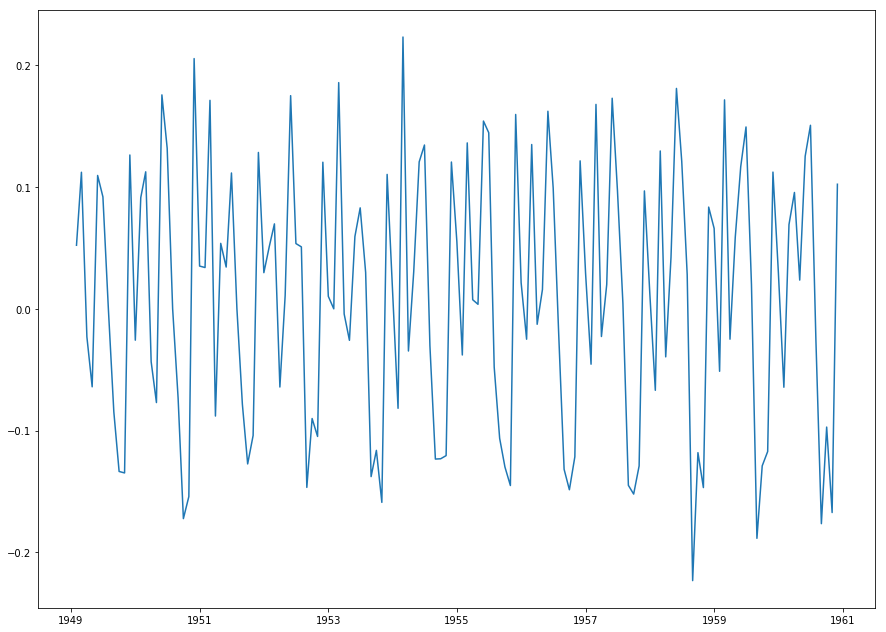

In [34]:
# Time Shift Transformation
plt.figure(figsize=(15,11))
datasetLogDiffShifting = dataset_log - dataset_log.shift()
plt.plot(datasetLogDiffShifting)

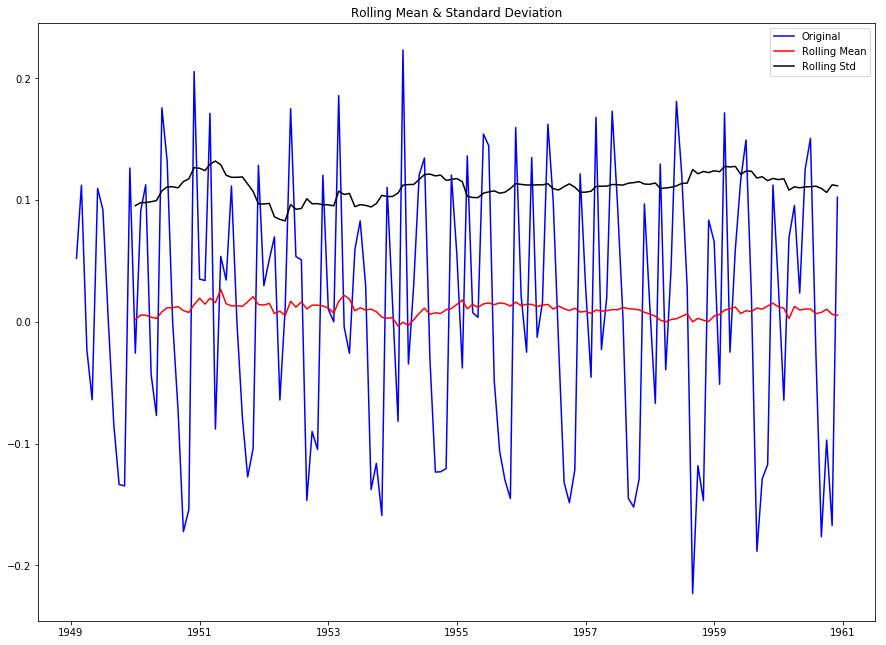

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [35]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

__From above 2 graphs, we can see that, visually this is the best result as our series along with rolling statistic values of moving avg & moving std. dev. is very much flat & stationary. But, the ADCF test shows us that:__

* p-value of 0.07 is not as good as 0.005 of exponential decay.
* Test Statistic value not as close to the critical values as that for exponential decay.

I have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, i will go with the log scale. The reason for doing this is that i can revert back to the original scale during forecasting.

I will now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part by decomposing


/home/arsal/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


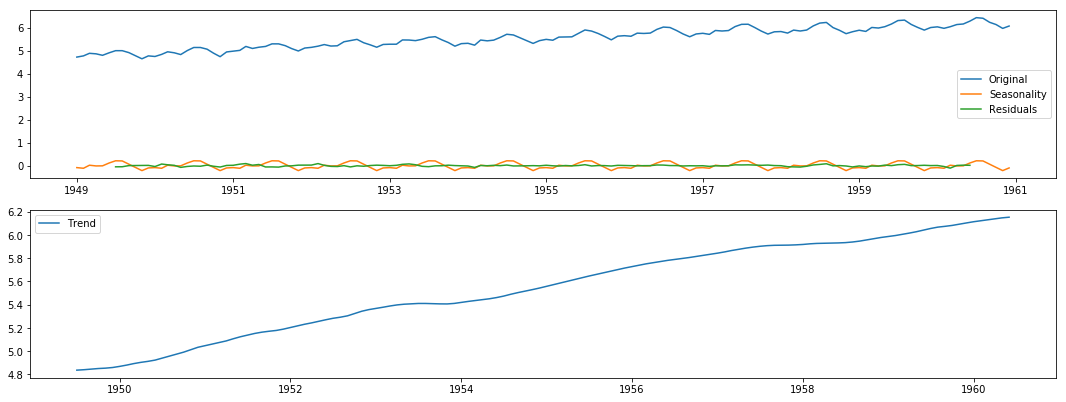

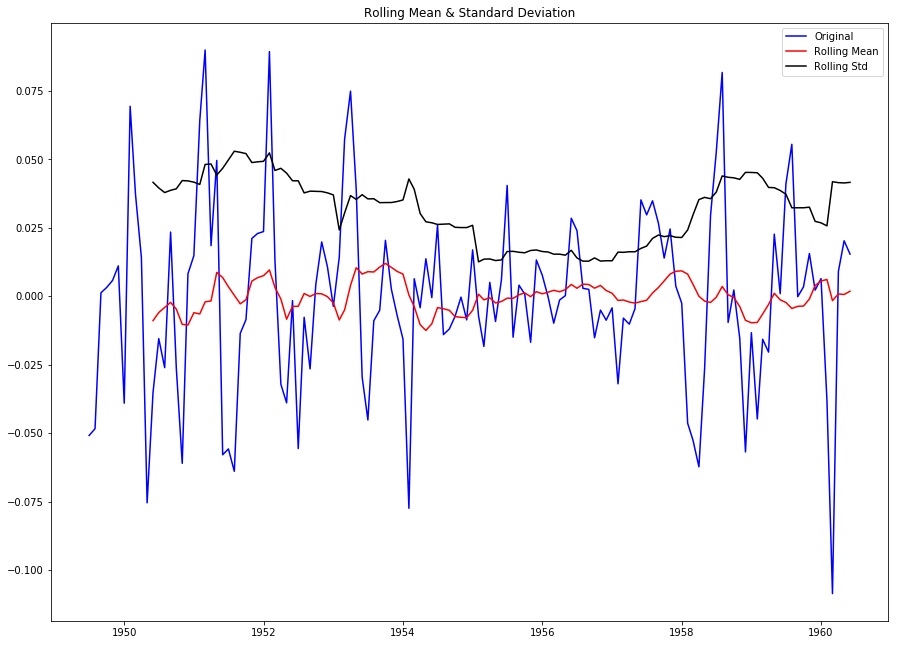

Results of Dickey Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [36]:
decomposition = seasonal_decompose(dataset_log) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 11))
plt.subplot(411)
plt.plot(dataset_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


/home/arsal/.local/lib/python2.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


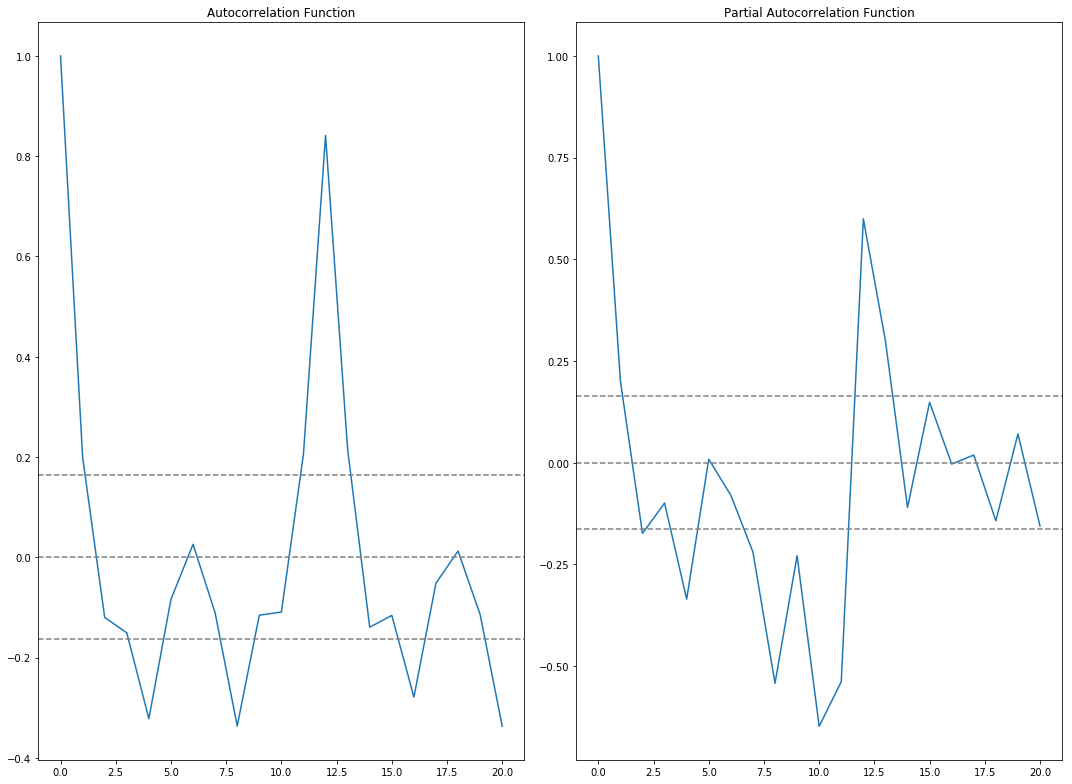

In [37]:
#### Plotting ACF and PACF
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.figure(figsize=(15, 11))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

__I need to calculate at my own that how the x =2 while y =0__

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

### Building Model

/home/arsal/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/arsal/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


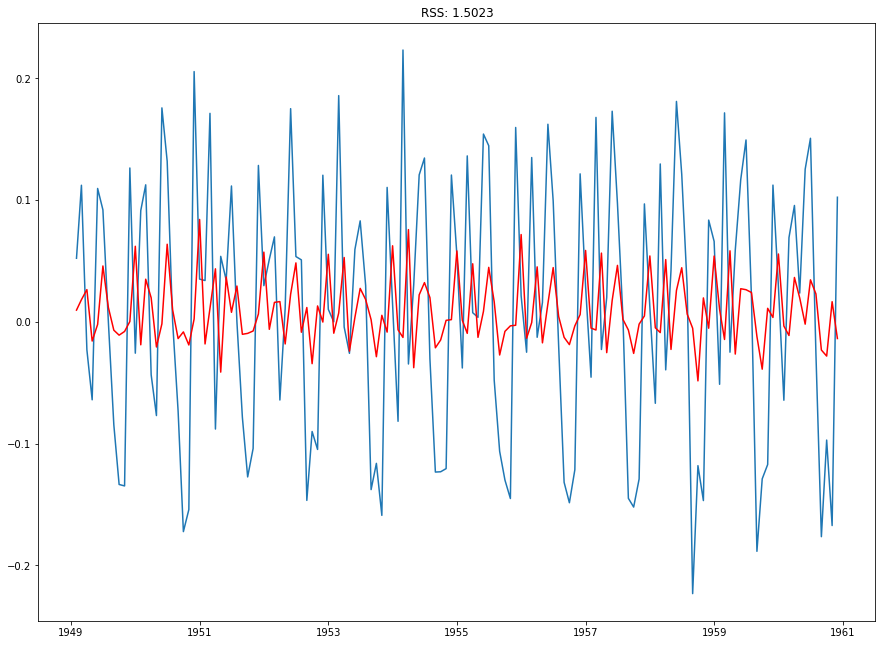

In [38]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(dataset_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(15,11))
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting AR model')

/home/arsal/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/arsal/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


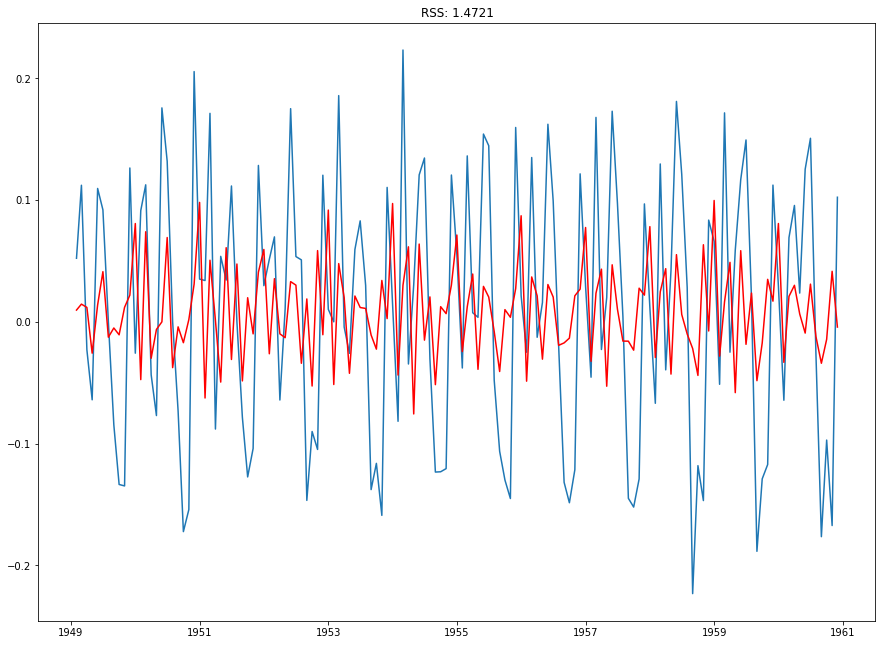

In [39]:
#MA Model
model = ARIMA(dataset_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(15,11))
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting MA model')

/home/arsal/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/arsal/.local/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA model


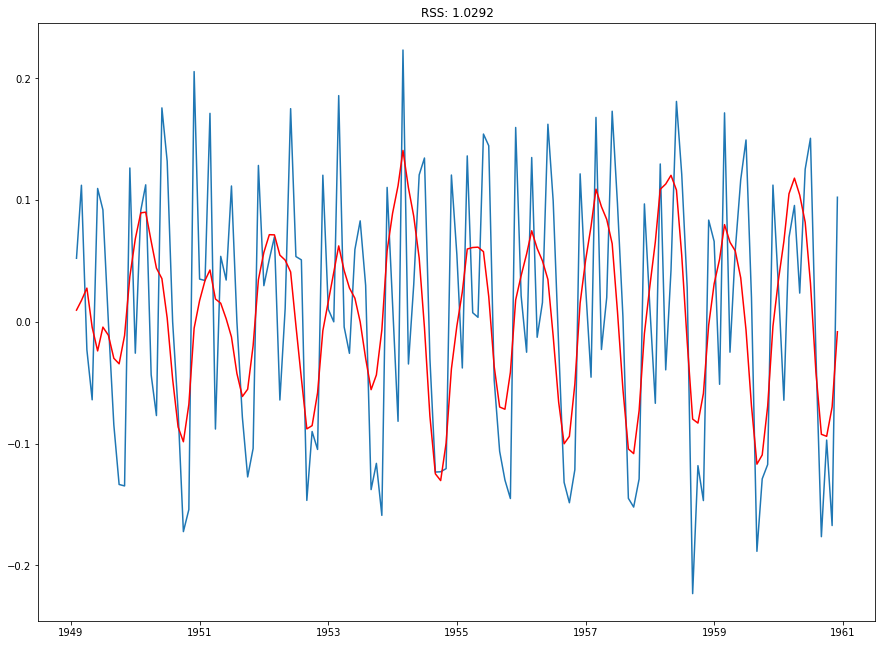

In [40]:
# AR+I+MA = ARIMA model
model = ARIMA(dataset_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15,11))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Passengers'])**2))
print('Plotting ARIMA model')

The RSS error is calculated using the formula that he has given in the last line of that block i.e. sum of squared difference of fitted values of the model and actual values .

By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 1.0292, indicating ARIMA to be better than its individual component models.

With the ARIMA model built, we will now generate predictions. But, before we do any plots for predictions ,we need to reconvert the predictions back to original form. This is because, our model was built on log transformed data.

#### Prediction & Reverse transformations 

In [41]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
1949-07-01   -0.004347
1949-08-01   -0.010978
1949-09-01   -0.029929
1949-10-01   -0.034467
1949-11-01   -0.011279
1949-12-01    0.037212
1950-01-01    0.068135
1950-02-01    0.089434
1950-03-01    0.090029
1950-04-01    0.066152
1950-05-01    0.044053
1950-06-01    0.035467
1950-07-01    0.003100
1950-08-01   -0.047127
1950-09-01   -0.086353
1950-10-01   -0.098465
1950-11-01   -0.067846
1950-12-01   -0.005228
1951-01-01    0.017385
1951-02-01    0.034016
1951-03-01    0.042561
1951-04-01    0.018748
1951-05-01    0.015260
1951-06-01    0.002489
1951-07-01   -0.012408
                ...   
1958-07-01    0.054477
1958-08-01   -0.016466
1958-09-01   -0.079842
1958-10-01   -0.083143
1958-11-01   -0.058869
1958-12-01   -0.002662
1959-01-01    0.031199
1959-02-01    0.051445
1959-03-01    0.079807
1959-04-01    0.065334
1959-05-01    0.058190
1959-06-01    0.036074
1959-

In [42]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
1949-07-01    0.021984
1949-08-01    0.011007
1949-09-01   -0.018922
1949-10-01   -0.053389
1949-11-01   -0.064668
1949-12-01   -0.027456
1950-01-01    0.040679
1950-02-01    0.130113
1950-03-01    0.220142
1950-04-01    0.286294
1950-05-01    0.330348
1950-06-01    0.365815
1950-07-01    0.368915
1950-08-01    0.321788
1950-09-01    0.235435
1950-10-01    0.136970
1950-11-01    0.069124
1950-12-01    0.063896
1951-01-01    0.081281
1951-02-01    0.115296
1951-03-01    0.157858
1951-04-01    0.176605
1951-05-01    0.191865
1951-06-01    0.194354
1951-07-01    0.181946
                ...   
1958-07-01    1.166556
1958-08-01    1.150091
1958-09-01    1.070249
1958-10-01    0.987106
1958-11-01    0.928237
1958-12-01    0.925574
1959-01-01    0.956773
1959-02-01    1.008218
1959-03-01    1.088025
1959-04-01    1.153359
1959-05-01    1.211549
1959-06-01    1.247623
1959-

In [43]:
predictions_ARIMA_log = pd.Series(dataset_log['Passengers'].iloc[0], index=dataset_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665110
1949-11-01    4.653831
1949-12-01    4.691043
1950-01-01    4.759178
1950-02-01    4.848612
1950-03-01    4.938641
1950-04-01    5.004793
1950-05-01    5.048846
1950-06-01    5.084314
1950-07-01    5.087414
1950-08-01    5.040287
1950-09-01    4.953934
1950-10-01    4.855469
1950-11-01    4.787622
1950-12-01    4.782395
1951-01-01    4.799780
1951-02-01    4.833795
1951-03-01    4.876357
1951-04-01    4.895104
1951-05-01    4.910364
1951-06-01    4.912853
                ...   
1958-07-01    5.885055
1958-08-01    5.868590
1958-09-01    5.788748
1958-10-01    5.705605
1958-11-01    5.646735
1958-12-01    5.644073
1959-01-01    5.675272
1959-02-01    5.726717
1959-03-01    5.806524
1959-04-01    5.871858
1959-05-01    5.930048
1959-06-01    5.966122
1959-

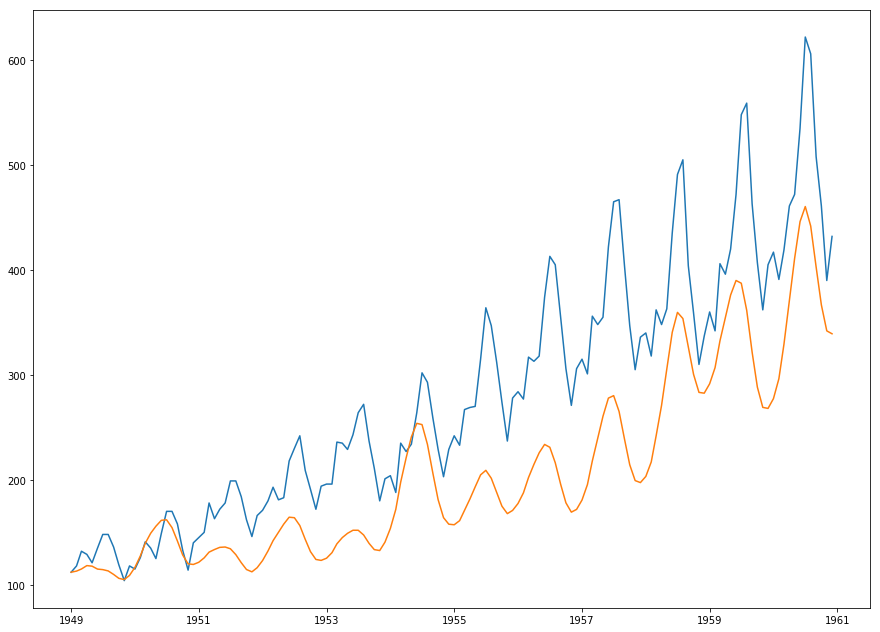

In [44]:
# Inverse of log is exp.
plt.figure(figsize=(15,11))
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dataset)
plt.plot(predictions_ARIMA)



We see that our predicted forecasts are very close to the real time series values indicating a fairly accurate model.


In [45]:
original_data

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [46]:
#We have 144(existing data of 12 yrs in months) data points. We have trained our model on 7 years which is 84 data points
#And we want to forecast for 5 years 60 data points
# plt.figure(figsize=(11,14))
# results_ARIMA.plot_predict(84,143) 

### Modifications for testing

In [47]:
predictions_ARIMA

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073416
1949-04-01    118.301995
1949-05-01    117.768372
1949-06-01    114.988279
1949-07-01    114.489527
1949-08-01    113.239586
1949-09-01    109.900663
1949-10-01    106.177218
1949-11-01    104.986417
1949-12-01    108.966781
1950-01-01    116.649993
1950-02-01    127.563206
1950-03-01    139.580469
1950-04-01    149.126221
1950-05-01    155.842594
1950-06-01    161.469079
1950-07-01    161.970448
1950-08-01    154.514292
1950-09-01    141.731414
1950-10-01    128.440877
1950-11-01    120.015688
1950-12-01    119.389941
1951-01-01    121.483658
1951-02-01    125.687082
1951-03-01    131.151949
1951-04-01    133.633925
1951-05-01    135.688796
1951-06-01    136.026966
                 ...    
1958-07-01    359.622571
1958-08-01    353.749680
1958-09-01    326.603860
1958-10-01    300.547232
1958-11-01    283.364907
1958-12-01    282.611458
1959-01-01    291.567637
1959-02-01    306.959920
1959-03-01    332.4

In [48]:
temp_dt = pd.DataFrame(predictions_ARIMA, columns=['Passengers'])
temp_dt
temp_dt.reset_index(inplace=True)
temp_dt

,Month,Passengers
0,1949-01-01,112.000000
1,1949-02-01,113.078122
2,1949-03-01,115.073416
3,1949-04-01,118.301995
4,1949-05-01,117.768372
5,1949-06-01,114.988279
6,1949-07-01,114.489527
7,1949-08-01,113.239586
8,1949-09-01,109.900663
9,1949-10-01,106.177218


In [49]:
pd.set_option('display.max_rows', 1000)
temp_dt

,Month,Passengers
0,1949-01-01,112.000000
1,1949-02-01,113.078122
2,1949-03-01,115.073416
3,1949-04-01,118.301995
4,1949-05-01,117.768372
5,1949-06-01,114.988279
6,1949-07-01,114.489527
7,1949-08-01,113.239586
8,1949-09-01,109.900663
9,1949-10-01,106.177218


In [50]:
testing_predictions = temp_dt.iloc[84:]
testing_predictions.reset_index(inplace=True)

In [51]:
testing_predictions.drop(['index'], axis=1, inplace=True)
testing_predictions

/home/arsal/.local/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Month,Passengers
0,1956-01-01,177.490185
1,1956-02-01,187.648619
2,1956-03-01,202.211844
3,1956-04-01,214.770294
4,1956-05-01,225.793108
5,1956-06-01,233.783010
6,1956-07-01,231.045324
7,1956-08-01,216.311316
8,1956-09-01,195.700778
9,1956-10-01,178.140151


In [52]:
testing_data.reset_index(inplace=True)

In [53]:
testing_data

,Month,Passengers
0,1956-01-01,284
1,1956-02-01,277
2,1956-03-01,317
3,1956-04-01,313
4,1956-05-01,318
5,1956-06-01,374
6,1956-07-01,413
7,1956-08-01,405
8,1956-09-01,355
9,1956-10-01,306


In [54]:
# Accuracy Metrics
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print("MAPE: " + str(np.mean(np.abs((y_true - y_pred) / y_true)) * 100) + "%")
#     print("Variance Score: " + str(explained_variance_score(y_true, y_pred)))
#     print("MAE: " + str(mean_absolute_error(y_true, y_pred)))
#     print("MSE: " + str(mean_squared_error(y_true, y_pred)))
    print("R2 score: " + str(r2_score(y_true, y_pred)))


In [55]:
mean_absolute_percentage_error(testing_data.Passengers,testing_predictions.Passengers)

MAPE: 28.598558135565604%
R2 score: -1.214103602835284


Forecasting results are not good enough, difference between the observed data and the actual data is bit high as our accuracy measures have shown (R2 score: a negative co-relation of -1.214 and MAPE is bit high about 28.5%). But the good part in our forecasting is that the peaks and the drops of our forecasting result is alomost same as the actual data.